### <p style="text-align: right;">Alasia Miller</p>

# Problem Solving Project 

## Introduction
   COVID-19 is the infectious coronavirus pandemic caused by Severe Acute Respiratory Syndrome coronavirus (SARS-CoV-2)(1). SARS-CoV-2's receptor binding domain (RBD) is integral in the contagiousness of COVID-19. The SARS-CoV-2 RBD is typified by its ability to fuse, attach and gain viral entry into host cells(2). The RBD is capable of doing this because it is located on the Spike glycoprotein. The Spike glycoprotein is what regulates fusion to the host membrane, and releases the virus to the cytoplasm using  intracellular receptors(3). The C-terminal domain in SARS-CoV-2, is where the cleaved RBD is synthesized as a pro-peptide(4). The cleavage site causes the formation of the S1 subunit and the S2 subunit. To learn more about the significance of the variability of the RBD, I performed an analysis on the sequence by means of literature mining, and several bioinformatics websites, libraries and tools.


## Methods 

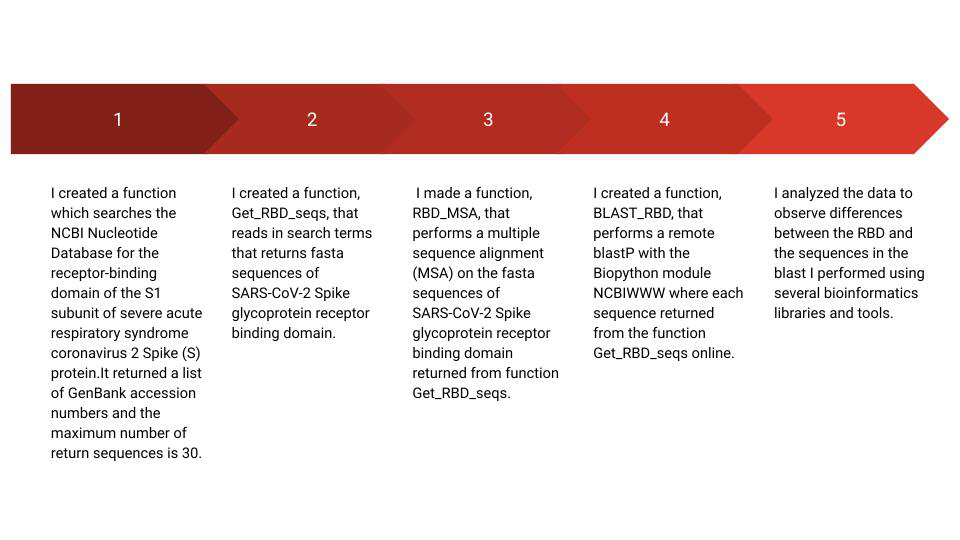

In [154]:
import IPython.display as display
from PIL import Image
myflowchart = Image.open('flowchart.jpg')
display.display(myflowchart)

## Materials

#### Websites
-  Python 
-  Uniprot
-  PDB
-  GenBank
-  KEGG
-  RCSB (Protein Data Bank)
-  Genome.jp

####  Tools/packages 
- import sys: access system-specific parameters and functions
- from Bio import Entrez, SeqIO: Entrez retrieves related sequences, structures, and references.
- import os: functions for creating and removing a directory (folder), fetching its content
- import shutil: operation on a file, including the ability to copy, create, and perform remote operation the file
- from Bio.Align.Applications import ClustalwCommandline: create a clustalw command line
- from Bio import SearchIO: efficient interface across various search output files
- from Bio.Blast import NCBIWWW: invoke NCBI BLAST server over the internet
- %matplotlib inline: outputs are stored and displayed within the notebook
- from IPython.display: import Image  
- import io: use the methods/types in the io module  
- from Bio import SeqIO: Import Biopython modules to interact with KEGG
- from Bio.KEGG import REST: provides access to a different KEGG databases
- from Bio.KEGG.KGML import KGML_parser: returns Pathway object
- from IPython.display import Image: display image
- from tempfile import NamedTemporaryFile: makes file with a name, accessed from name attribute
- import IPython.display as display: display image
- from PIL import Image: visualizing library that provides python with image modification abilities


## Results

In [14]:
def Get_GenBank(your_email, search, max_number):  
    import sys
    from Bio import Entrez, SeqIO  # import the entrez tool from the Parent 'Bio'. 

    Entrez.email = your_email
    handle = Entrez.esearch(db = "protein", term=search, retmax = max_number) # search records from the database
    record = Entrez.read(handle) #define a variable that will hold esearch output.
    #handle.close()
    record_list = record["IdList"] # search returns accession IDs
    print(record_list) 
    
    return(record_list)

ID_list = Get_GenBank("alasiamiller@nyu.edu", "receptor-binding domain of the S1 subunit of severe acute respiratory syndrome coronavirus 2 Spike (S) protein", 30) #calling function


['2095498979', '2095498977', '2106681594', '2106681593', '2106681592', '2106681562', '2106681561', '2106681560', '2106681559', '2106681558', '2106681557', '2106680983', '2103672368', '2095359144', '2085608314', '2076014181', '2076014180', '2076014179', '2076014175', '2076014174', '2076014173', '2076014158', '2076014157', '2076014156', '2020318213', '2203511973', '2203511700', '2203511429', '2203511416', '2203511403']


In [23]:
def Get_RBD_seqs(your_email, record_list, outfile):
    import sys #import applications
    from Bio import Entrez, SeqIO

    Entrez.email = your_email
    handle = Entrez.efetch(db = "protein", id = record_list, rettype = 'fasta', retmode = 'retmode') # fetch records from the database
    handle.close() 

    with open(outfile, "w") as outfile: # write data to a file
        outfile.write(data)
    
Get_RBD_seqs("alasiamiller@nyu.edu", ID_list, 'Get_RBD_seqs.txt') #calling function
fa = open("Get_RBD_seqs.txt", "r") #read file to visualize output
print(fa.read()) #read file to visualize output


>UAT96759.1 surface glycoprotein [Severe acute respiratory syndrome coronavirus 2]
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHV
SGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPF
LGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPI
NLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYN
ENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASV
YAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIAD
YNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYF
PLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFL
PFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLT
PTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTHTNSPRRARSVASQSIIAYTMSLG
AENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGI
AVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDC
LGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYR

In [27]:
def RBD_MSA(in_file, out_file):
    import os
    import shutil
    from Bio.Align.Applications import ClustalwCommandline #load in packages
    import sys
    from Bio import Entrez, SeqIO
    clustal_exe ='.\clustalo -i in_file -o out_file--outfmt=clu' #run Clustal
    clustalw_cline = ClustalwCommandline(clustal_exe, infile=in_file)

MSA = RBD_MSA("Get_RBD_seqs.txt","Get_RBD_seqss.aln")
f = open("Get_RBD_seqss.aln") #read file to visualize output
print(f.read())

CLUSTAL O(1.2.2) multiple sequence alignment


UAT96759.1      MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFS
UAT96758.1      MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFS
pdb|7S0E|L      ------------------------------------------------------------
pdb|7S0E|H      ------------------------------------------------------------
pdb|7S0E|A      MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFS
pdb|7S0B|F      ------------------------------------------------------------
pdb|7S0B|E      ------------------------------------------------------------
pdb|7S0B|D      ------------------------------------------------------------
pdb|7S0B|C      ------------------------------------------------------------
pdb|7S0B|B      ------------------------------------------------------------
pdb|7S0B|A      ------------------------------------------------------------
pdb|7N4J|A      ------------------------------------------------------------
pdb|7FG3|A      MFVFLVLLPLVSS

In [39]:
def BLAST_RBD(gb_file):
    from Bio import SearchIO
    from Bio.Blast import NCBIWWW
    with open(gb_file) as fasta_string: # open a file for reading 
            gb_file.read()
    result_handle = NCBIWWW.qblast("blastp", "protein", fasta_string) #BLAST search using NCBI's QBLAST server 
    BLAST_RBD('BLAST_RBD.xml') #call function

gif = open("BLAST_RBD.xml") #read file to visualize output
print(gif.read()) 


<?xml version="1.0"?>
<!DOCTYPE BlastOutput PUBLIC "-//NCBI//NCBI BlastOutput/EN" "http://www.ncbi.nlm.nih.gov/dtd/NCBI_BlastOutput.dtd">
<BlastOutput>
  <BlastOutput_program>blastp</BlastOutput_program>
  <BlastOutput_version>BLASTP 2.13.0+</BlastOutput_version>
  <BlastOutput_reference>Stephen F. Altschul, Thomas L. Madden, Alejandro A. Sch&amp;auml;ffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), &quot;Gapped BLAST and PSI-BLAST: a new generation of protein database search programs&quot;, Nucleic Acids Res. 25:3389-3402.</BlastOutput_reference>
  <BlastOutput_db>protein</BlastOutput_db>
  <BlastOutput_query-ID>Query_57358</BlastOutput_query-ID>
  <BlastOutput_query-def>NP_031681.2 B-cell antigen receptor complex-associated protein alpha chain precursor [Mus musculus]</BlastOutput_query-def>
  <BlastOutput_query-len>220</BlastOutput_query-len>
  <BlastOutput_param>
    <Parameters>
      <Parameters_matrix>BLOSUM62</Parameters_matrix>
      <Parameters_expec

In [19]:
def Read_BLASTRBD(in_file):
    with open(in_file) as query: # open a file for reading 
            if "Mus" in line: #conditional statement with the key word 'in' to ignore data in a line that include 'mus'
                continue
            if line.startswith("Query"): #returns if a string starts with another "Query"
                print(line +"\n")
Read_BLASTRBD("/Users/Alasi/Problem Solving (Brathwaite)/blastp.txt") #calling function

Query_32645 pdb|7VX5|E Chain E, Spike glycoprotein 1261 0 0 0 0 -1 -1 -1 3 


Query_32646 pdb|7VX4|E Chain E, Spike glycoprotein 1258 0 0 0 0 -1 -1 -1 4 


Query_32647 QTI92661.1 surface glycoprotein [Severe acute respiratory syndrome coronavirus 2] 1273 0 0 0 0 -1 -1 -1 5 


Query_32648 UMP12912.1 surface glycoprotein [Severe acute respiratory syndrome coronavirus 2] 1273 0 0 0 0 -1 -1 -1 6 


Query_32649 UMP12660.1 surface glycoprotein [Severe acute respiratory syndrome coronavirus 2] 1273 0 0 0 0 -1 -1 -1 7 


Query_32650 UMP12410.1 surface glycoprotein [Severe acute respiratory syndrome coronavirus 2] 1273 0 0 0 0 -1 -1 -1 8 


Query_32651 UMP12398.1 surface glycoprotein [Severe acute respiratory syndrome coronavirus 2] 1273 0 0 0 0 -1 -1 -1 9 


Query_32652 UMP12386.1 surface glycoprotein [Severe acute respiratory syndrome coronavirus 2] 1273 0 0 0 0 -1 -1 -1 10 


Query_32653 UMP12374.1 surface glycoprotein [Severe acute respiratory syndrome coronavirus 2] 1273 0 0 0 0 -1 -1 -1 1

# Discussion


To clean the blastp.txt file, I removed 'mus' from the query results, as I am observing the receptor-binding domain of the S1 subunit of severe acute respiratory syndrome coronavirus 2 Spike (S) protein, not the B-cell antigen receptor complex-associated protein alpha chain in a Mus Musculus, or house mouse. The entirety of the SARS-CoV-2 Spike protein is 1273 amino acids long(5). Within the positions illustrated by my BLASTRBD function, is the S1 subunit, which is localized at 14–685 residues, and the S2 subunit which is located at 686–1273 residues(6). Therefore, Query_32664, Query_32665,  Query_32666,  Query_32667,  Query_32668,  Query_32669 are the S1 subunit, because the length of these residues ranges from 243 to 404(6). The rest of the query results are the S2 subunit. However, I noticed a discrepancy in size, despite them being a part of the S2 subunit. Query_32647, Query_32648, Query_32649, Query_32650 ,Query_32651, Query_32652, Query_32653, Query_32654, Query_32671, Query_32672, Query_32673 all have the exact same length, which is 1273. The site indicates the cytoplasmic tail, in which often truncated variants facilitate spike glycoprotein incorporation(7). The range 1237 to 1273 is defined as Coronavirus spike glycoprotein S2, intravirion(8). In PMID, the entry was indicative of the intravirion region located at the C-terminus of coronavirus spike proteins(9), that is rich in cysteine. The cysteine residues in Spike proteins are marked for the post-translational modification (PTM) palmitoylation, which is integral for adequate Spike incorporation into an entire virus particle in addition to, modulated membrane fusions(10).

I noticed a pattern in the following queries: Query_32655, Query_32656, Query_32657, Query_32658, Query_32659, Query_32660, Query_32661, Query_32662 ,Query_32663. Although they had all different lengths, each entry was coupled by their pdb accession numbers. I wanted to see why this discrepancy was occuring for these entries. Query_32655, Query_32656, and Query_32657 pdb accession number is 7VX1. Query_32658, Query_32659, Query_32660 pdb accession number is 7VXA. Query_32661, Query_32662, Query_32663 is pdb accession number is 7VX9. Using www.rcsb.org, I found out that all three sequences (7VX9, 7VXA, 7VX1) had the same UniProt ID. This is true as well for the RBD, as the UniProt ID number is Q9NNX6. I used a feature UniProt provides to request a webpage on the queries. The following code gave me the necessary tools to do the literature mining I needed to further my analysis. 

In [129]:
x = requests.get("https://www.uniprot.org/uniprot/P0DTC2.txt") #retrieving 7VX1 SARS-CoV-2 Beta variant spike protein in open state
x.raise_for_status()
print(x.text[:2000])

ID   SPIKE_SARS2             Reviewed;        1273 AA.
AC   P0DTC2;
DT   22-APR-2020, integrated into UniProtKB/Swiss-Prot.
DT   22-APR-2020, sequence version 1.
DT   23-FEB-2022, entry version 10.
DE   RecName: Full=Spike glycoprotein {ECO:0000255|HAMAP-Rule:MF_04099};
DE            Short=S glycoprotein {ECO:0000255|HAMAP-Rule:MF_04099};
DE   AltName: Full=E2 {ECO:0000255|HAMAP-Rule:MF_04099};
DE   AltName: Full=Peplomer protein {ECO:0000255|HAMAP-Rule:MF_04099};
DE   Contains:
DE     RecName: Full=Spike protein S1 {ECO:0000255|HAMAP-Rule:MF_04099};
DE   Contains:
DE     RecName: Full=Spike protein S2 {ECO:0000255|HAMAP-Rule:MF_04099};
DE   Contains:
DE     RecName: Full=Spike protein S2' {ECO:0000255|HAMAP-Rule:MF_04099};
DE   Flags: Precursor;
GN   Name=S {ECO:0000255|HAMAP-Rule:MF_04099}; ORFNames=2;
OS   Severe acute respiratory syndrome coronavirus 2 (2019-nCoV) (SARS-CoV-2).
OC   Viruses; Riboviria; Orthornavirae; Pisuviricota; Pisoniviricetes;
OC   Nidovirales; Cornidovirineae;

In [94]:
def uniprot_sequence(id):
    from Bio import SeqIO
    from tempfile import NamedTemporaryFile
    import os  
    t = requests.get(f"https://www.uniprot.org/uniprot/{id}.fasta")
    t.raise_for_status() #returns an HTTPError object if an error has occurred during the process. 

    with NamedTemporaryFile(suffix=".fasta", mode="w", delete=False) as temp_file: #module creates temporary files and directories.
         temp_file.write(t.text) 

    seq = SeqIO.read( temp_file.name, format="fasta") # single record only (P0DTC2)
    os.remove(temp_file.name) #remove or delete a file path 
 
    return seq 
seq = uniprot_sequence("P0DTC2")
print(seq)


ID: sp|P0DTC2|SPIKE_SARS2
Name: sp|P0DTC2|SPIKE_SARS2
Description: sp|P0DTC2|SPIKE_SARS2 Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=S PE=1 SV=1
Number of features: 0
Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT')


In [165]:
x = requests.get("https://www.uniprot.org/uniprot/Q9NNX6.txt") #retrieving 7VX1 SARS-CoV-2 Beta variant spike protein in open state
x.raise_for_status()
print(x.text[:1000])

ID   CD209_HUMAN             Reviewed;         404 AA.
AC   Q9NNX6; A8KAM4; A8MVQ9; G5E9C4; Q2TB19; Q96QP7; Q96QP8; Q96QP9; Q96QQ0;
AC   Q96QQ1; Q96QQ2; Q96QQ3; Q96QQ4; Q96QQ5; Q96QQ6; Q96QQ7; Q96QQ8;
DT   13-APR-2004, integrated into UniProtKB/Swiss-Prot.
DT   01-OCT-2000, sequence version 1.
DT   23-FEB-2022, entry version 189.
DE   RecName: Full=CD209 antigen;
DE   AltName: Full=C-type lectin domain family 4 member L;
DE   AltName: Full=Dendritic cell-specific ICAM-3-grabbing non-integrin 1;
DE            Short=DC-SIGN;
DE            Short=DC-SIGN1;
DE   AltName: CD_antigen=CD209;
GN   Name=CD209; Synonyms=CLEC4L;
OS   Homo sapiens (Human).
OC   Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi; Mammalia;
OC   Eutheria; Euarchontoglires; Primates; Haplorrhini; Catarrhini; Hominidae;
OC   Homo.
OX   NCBI_TaxID=9606;
RN   [1]
RP   NUCLEOTIDE SEQUENCE [MRNA] (ISOFORM 1), SUBCELLULAR LOCATION, FUNCTION
RP   (MICROBIAL INFECTION), AND INTERACTION WITH HIV-1 GP120 (MICROBIA

In [163]:
def uniprot_sequence(id):
    from Bio import SeqIO
    from tempfile import NamedTemporaryFile
    import os  
    t = requests.get(f"https://www.uniprot.org/uniprot/{id}.fasta")
    t.raise_for_status() #returns an HTTPError object if an error has occurred during the process. 

    with NamedTemporaryFile(suffix=".fasta", mode="w", delete=False) as temp_file: #module creates temporary files and directories.
         temp_file.write(t.text)

    seq = SeqIO.read( temp_file.name, format="fasta") # single record only (Q9NNX6)
    os.remove( temp_file.name) #remove or delete a file path

    return seq 
seq = uniprot_sequence("Q9NNX6")
print(seq)


ID: sp|Q9NNX6|CD209_HUMAN
Name: sp|Q9NNX6|CD209_HUMAN
Description: sp|Q9NNX6|CD209_HUMAN CD209 antigen OS=Homo sapiens OX=9606 GN=CD209 PE=1 SV=1
Number of features: 0
Seq('MSDSKEPRLQQLGLLEEEQLRGLGFRQTRGYKSLAGCLGHGPLVLQLLSFTLLA...PPA')


7VX1 shows the biological assembly, or crystal structure, of the SARS-CoV-2 Beta variant spike protein in open state. 7VXA shows the biological assembly of the SARS-CoV-2 Kappa variant spike protein in complex with ACE2, state C2a. 7VX9 shows the biological assembly of the SARS-CoV-2 Kappa variant spike protein in complex with ACE2, state C1. C1 or conformations 1, is the closed state  where the dominant S glycoprotein binds to ACE2 through the RBD(11). C2a is a sub-conformation of the activated and stable state, which contributes to receptor binding. Thus, a feature that contributes to the highly infectious nature of SARS-CoV-2 is the conformational ***variability*** in the receptor binding domain.

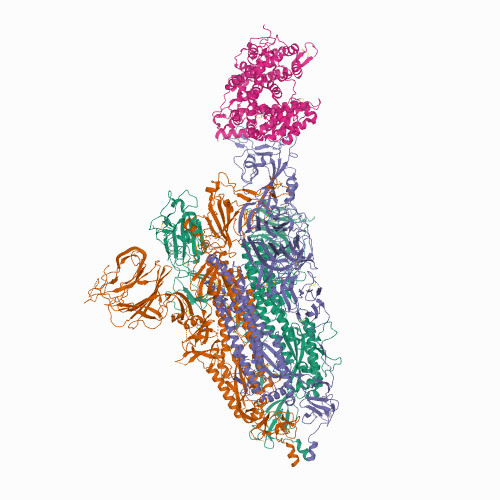

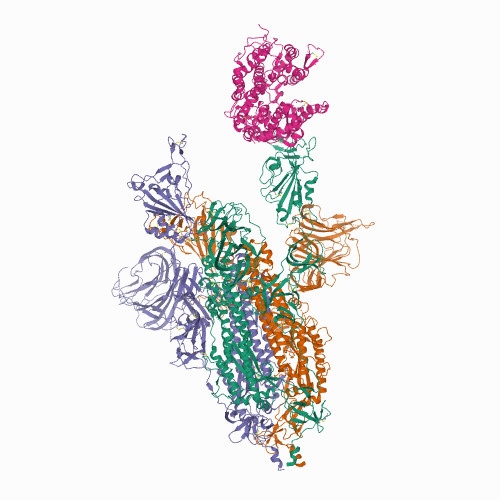

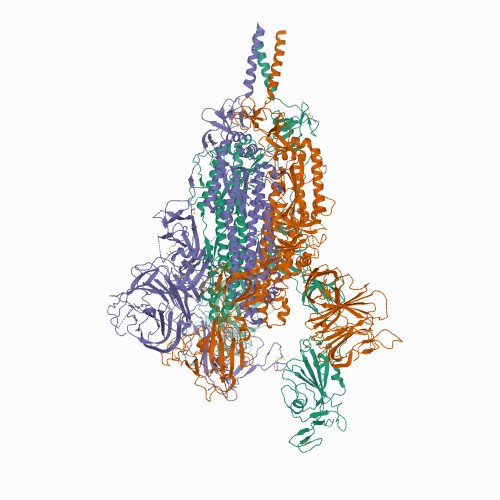

In [160]:
import IPython.display as display
from PIL import Image
myImage = Image.open('7VX9.jpeg') # image of biological assembly of the SARS-CoV-2 Spike glycoprotein 7vx9
myImage2 = Image.open('7VXA.jpeg')#image of biological assembly of the SARS-CoV-2 Spike glycoprotein 7vxa
myImage3 = Image.open('7VX1.jpeg')#image of biological assembly of the SARS-CoV-2 Spike glycoprotein 7vx1
display.display(myImage ,myImage2,myImage3)

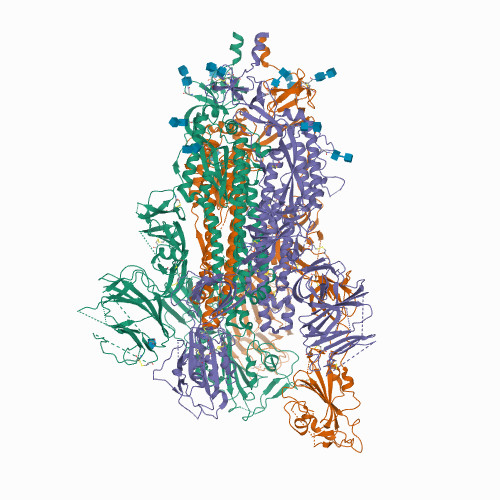

In [156]:
import IPython.display as display
from PIL import Image
RBD_assembly = Image.open("6vyb_assembly-1.jpeg") #image of biological assembly of the SARS-CoV-2 receptor Binding Domain
display.display(RBD_assembly)

For my next analysis, I utilized the Kegg browser interface to extract information about pathways in the accompanying database entries(12). I noticed that the entry for surface glycoproteins are unique for the database. Surface glycoproteins have significant physiological functions because of its vulnerability in host immune responses, and the novelty of its role in the SARS-COV-2 pathway is supported by its function. Because CD209 antigen isoforms are C-type lectin receptors,  which are high affinity binders to the RBD, it is shown to exacerbate proinflammatory responses. The ***variability*** of the RBD and surface glycoproteins in the intracellular signaling pathways are critical in the coaction that influences viral progenies and adaptive immunity.

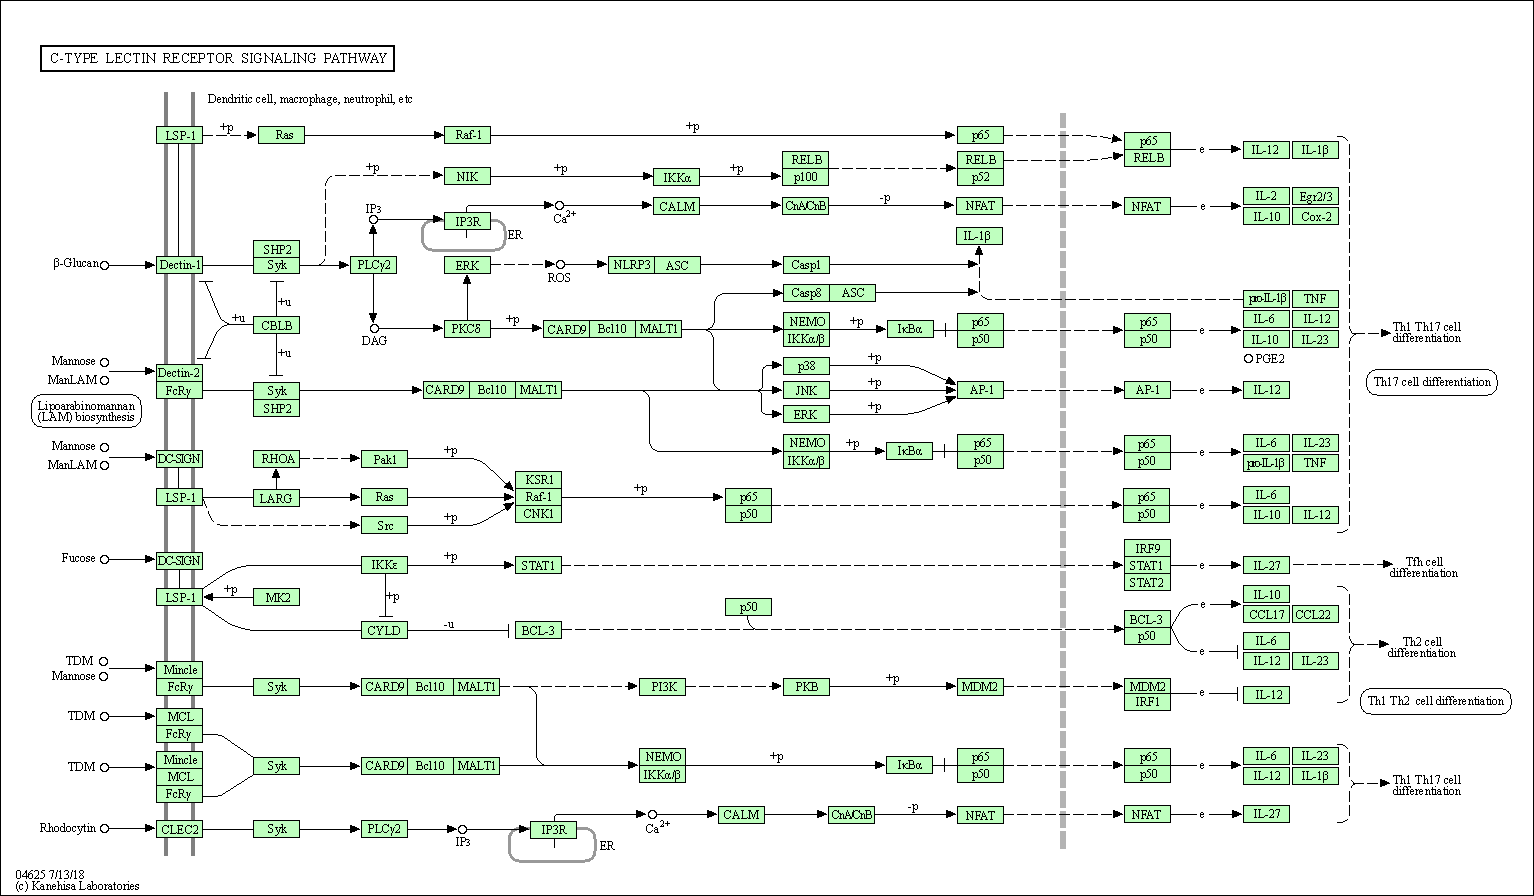

In [159]:
%matplotlib inline
from IPython.display import Image # Show images inline

import io # Standard library packages
import os
from Bio import SeqIO # Import Biopython modules to interact with KEGG
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser

pathway = REST.kegg_get("hsa04625", "image").read() #show image of pathway
Image(pathway) 


In [151]:
result = REST.kegg_get("hsa04625").read() #get reactions of the signaling pathways
print(result)

ENTRY       hsa04625                    Pathway
NAME        C-type lectin receptor signaling pathway - Homo sapiens (human)
DESCRIPTION C-type lectin receptors (CLRs) are a large superfamily of proteins characterized by the presence of one or more C-type lectin-like domains (CTLDs). CLRs function as pattern-recognition receptors (PRRs) for pathogen-derived ligands in dendric cells, macrophages, neutrophils, etc., such as Dectin-1 and Dectin-2 for recognition of fungi-derived B-glucan and high mannose-type carbohydrates. Upon ligand binding, CLRs stimulate intracellular signaling cascades that induce the production of inflammatory cytokines and chemokines, consequently triggering innate and adaptive immunity to pathogens.
CLASS       Organismal Systems; Immune system
PATHWAY_MAP hsa04625  C-type lectin receptor signaling pathway
DRUG        D12237  Zunsemetinib (USAN)
ORGANISM    Homo sapiens (human) [GN:hsa]
GENE        64581  CLEC7A; C-type lectin domain containing 7A [KO:K10074]
    

In [149]:
%matplotlib inline
from IPython.display import Image # Show images inline
import os # Standard library packages
import io
from Bio import SeqIO # Import Biopython modules to interact with KEGG
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser

result = REST.kegg_get("K24152").read()
print(result)

ENTRY       K24152                      KO
SYMBOL      S
NAME        SARS coronavirus spike glycoprotein
PATHWAY     map03230  Viral genome structure
            map05171  Coronavirus disease - COVID-19
NETWORK     nt06136  Complement activation (viruses)
            nt06171  Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
  ELEMENT   N01307  SARS-CoV-2 S to AngII-AT1R-NOX2 signaling pathway
            N01312  SARS-CoV-2 S to lectin pathway of complement activation
            N01314  SARS-CoV-2 S to classical pathway of complement activation
            N01316  SARS-CoV-2 S/N to lectin pathway of coagulation activation
BRITE       KEGG Orthology (KO) [BR:ko00001]
             09120 Genetic Information Processing
              09125 Information processing in viruses
               03230 Viral genome structure
                K24152  S; SARS coronavirus spike glycoprotein
             09160 Human Diseases
              09172 Infectious disease: viral
               05171 C

# Summary and Conclusion 

There is a functional significance in the variation between the receptor binding domain, and the other sequences in the NCBI BLAST database I invoked over the web. The research and assembly of information on these differences is useful, because understandings about variability could allow researchers to improve the development of drug targets for COVID-19. These vaccines could use inhibitors that target the receptor binding domain and SARS-CoV-2 spike (S) glycoprotein to facilitate the disruption of viral release into the host cell. Through the analysis of the NCBI BLAST database sequences, I gathered that the viral progenies and specific immunity are predicated on the variability of the receptor binding domain and surface glycoproteins within the signal transduction cascades, for example. Another finding of my research, is that an aspect which stimulates the highly infectious nature of SARS-CoV-2 is the variability in conformational propensity of the receptor binding domain. 

The next steps would be to observe how to weaken both the conformational integrity and flexibility of the receptor binding domain and S glycoprotein, since it contributes to the heightened transmission rates of COVID-19. One notable take away from my research, is that C1, which is the closed state where the dominant S glycoprotein binds to ACE2 through the receptor binding domain, is responsible for the biologically "tight" assembly of some of the SARS-CoV-2 Spike glycoproteins. I hypothesize that a practical strategy would be to block the Spike glycoprotein and ACE2 interaction to prevent SARS-CoV-2 entry into target cells. 


# References

1. Cascella M, Rajnik M, Aleem A, et al. Features, Evaluation, and Treatment of Coronavirus (COVID-19) In: StatPearls [Internet].Treasure Island (FL): StatPearls Publishing; 2022 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK554776/
2. Duan L, Zheng Q, Zhang H, Niu Y, Lou Y, Wang H. The SARS-CoV-2 Spike Glycoprotein Biosynthesis, Structure, Function, and Antigenicity: Implications for the Design of Spike-Based Vaccine Immunogens. Front Immunol. 2020 Oct 7;11:576622. doi: 10.3389/fimmu.2020.576622. PMID: 33117378; PMCID: PMC7575906.
3. Huang, Y., Yang, C., Xu, Xf. et al. Structural and functional properties of SARS-CoV-2 spike protein: potential antivirus drug development for COVID-19. Acta Pharmacol Sin 41, 1141–1149 (2020). https://doi.org/10.1038/s41401-020-0485-4
4. Lu S et al.(2020). "CDD/SPARCLE: the conserved domain database in 2020.", Nucleic Acids Res. 48(D1):D265-D268.
5. NCBI Resource Coordinators. Database resources of the National Center for Biotechnology Information. Nucleic Acids Res. 2016 Jan 4;44(D1):D7-19. doi: 10.1093/nar/gkv1290. Epub 2015 Nov 28. PMID: 26615191; PMCID: PMC4702911.
6. Pokhrel, S., Kraemer, B.R., Burkholz, S. et al. Natural variants in SARS-CoV-2 Spike protein pinpoint structural and functional hotspots with implications for prophylaxis and therapeutic strategies. Sci Rep 11, 13120 (2021). https://doi.org/10.1038/s41598-021-92641-x
7. Huang, Y., Yang, C., Xu, Xf. et al. Structural and functional properties of SARS-CoV-2 spike protein: potential antivirus drug development for COVID-19. Acta Pharmacol Sin 41, 1141–1149 (2020). https://doi.org/10.1038/s41401-020-0485-4
8. Chen HY, Huang C, Tian L, Huang X, Zhang C, Llewellyn GN, Rogers GL, Andresen K, O'Gorman MRG, Chen YW, Cannon PM. Cytoplasmic Tail Truncation of SARS-CoV-2 Spike Protein Enhances Titer of Pseudotyped Vectors but Masks the Effect of the D614G Mutation. J Virol. 2021 Oct 27;95(22):e0096621. doi: 10.1128/JVI.00966-21. Epub 2021 Sep 8. PMID: 34495700; PMCID: PMC8549521.
9. Ormo, M., Cubitt, A.B., Kallio, K., Gross, L.A., Tsien, R.Y., Remington, S.J. (1996) Crystal structure of the Aequorea victoria green fluorescent protein Science 273: 1392-1395 doi: 10.1126/science.273.5280.1392
10. Shulla A, Gallagher T. Role of spike protein endodomains in regulating coronavirus entry. J Biol Chem. 2009 Nov 20;284(47):32725-34. doi: 10.1074/jbc.M109.043547. Epub 2009 Sep 30. PMID: 19801669; PMCID: PMC2781689.
11. Blum M, Chang H, Chuguransky S, Grego T, Kandasaamy S, Mitchell A, Nuka G, Paysan-Lafosse T, Qureshi M, Raj S, RichardsonL, Salazar GA, Williams L, Bork P, Bridge A, Gough J, Haft DH, Letunic I, Marchler-Bauer A, Mi H, Natale DA, Necci M, Orengo CA, Pandurangan AP, Rivoire C, Sigrist CJA, Sillitoe I, Thanki N, Thomas PD, Tosatto SCE, Wu CH, Bateman A and Finn RD The InterPro protein families and domains database: 20 years on. Nucleic Acids Research, Nov 2020, (doi: 12.1093/nar/gkaa977
12. Kanehisa M, Goto S, Kawashima S, Okuno Y, Hattori M. The KEGG resource for deciphering the genome. Nucleic Acids Res. 2004 Jan 1;32(Database issue):D277-80. doi: 10.1093/nar/gkh063. PMID: 14681412; PMCID: PMC308797. 
13. Song, X., Shi, Y., Ding, W. et al. Cryo-EM analysis of the HCoV-229E spike glycoprotein reveals dynamic prefusion conformational changes. Nat Commun 12, 141 (2021). https://doi.org/10.1038/s41467-020-20401-y
14. H.R. Drew, R.M. Wing, T. Takano, C. Broka, S. Tanaka, K. Itakura, R.E.Dickerson) (1981) Structure of a B-DNA dodecamer: conformation and dynamics Proc.Natl.Acad.Sci.USA 78: 2179-2183
15. Zheng Zhang, Scott Schwartz, Lukas Wagner, and Webb Miller (2000), "A greedy algorithm for aligning DNA sequences", J Comput Biol 2000; 7(1-2):203-14
16. BLAST® Command Line Applications User Manual [Internet]. Bethesda (MD): National Center for Biotechnology Information (US); 2008-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK279690/
17. Clark K, Karsch-Mizrachi I, Lipman DJ, Ostell J, Sayers EW. GenBank. Nucleic Acids Res. 2016 Jan 4;44(D1):D67-72. doi: 10.1093/nar/gkv1276. Epub 2015 Nov 20. PMID: 26590407; PMCID: PMC4702903.
18. The UniProt Consortium, UniProt: the universal protein knowledgebase in 2021, Nucleic Acids Research, Volume 49, Issue D1, 8 January 2021, Pages D480–D489,
19. Van Rossum, G., & Drake Jr, F. L. (1995). Python reference manual. Centrum voor Wiskunde en Informatica Amsterdam.
20. H.M. Berman, K. Henrick, H. Nakamura (2003) Announcing the worldwide Protein Data Bank Nature Structural Biology 10 (12): 980.